Name-ANNU

ROLL_NO-EE21RESCH01010

SOURCE CODING ASSIGNMENT 2
 
Question 1

**CODE FOR ARITHMETIC CODES**

Arithmetic-code calculation:
1.Divide the numeric range 0 to 1 into number of different symbols present in the message.
2.Plotting the corresponding CDF with lower and upper limits.

3.Expand the first letter to be coded along with the range.Further subdivide this range into number of symbols.

3.Repeat the procedure until last termination character is encoded.

4.Terminate the encoded bits to ceil(log2(1/p(string))+1

5.Binary representation of F_bar is find out terminated by calculated terminated no. of bits.


This can be achieved easily with the help of these Recursive Formulas:-


**Recursive formulae for Arithematic Code**

G(x^n) = G(x^(n-1)) + p(x^(n-1))*G(x_n)  #modified cdf

p(x^n) = p(x^(n-1))*p(x_n)

F_bar(x^n)=G(x^n)+p(x^n)/2


Encoded codeword=binary representation of F_bar(x^n) terminated by ceil(log2(1/p(x^n))+1

In [1]:
#importing libraries

import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
#data given to us

symbols = ['a','b','c']
#prob_pmf = np.array([0.1,0.5,0.4])
prob_pmf=np.array([0.266726239842391,0.353436408132884,0.379837352024725])
pmf_dict=dict(zip(symbols,prob_pmf))
#Calculating G(a),G(b),G(c)
G_values=[sum(prob_pmf[0:i]) for i in range(len(prob_pmf))]
initial_G_dict=dict(zip(symbols,G_values)) #forming dictionary
print("pmf of symbols in dictionary form is",pmf_dict)
print("Initial G values of symbols in dictionary form is",initial_G_dict)

#input_sequence1='bbca'
input_sequence1='cbcabbbbcb'
input_sequence2='abcbcbcbcc'

pmf of symbols in dictionary form is {'a': 0.266726239842391, 'b': 0.353436408132884, 'c': 0.379837352024725}
Initial G values of symbols in dictionary form is {'a': 0, 'b': 0.266726239842391, 'c': 0.6201626479752751}


Text(0.5, 1.0, 'G values')

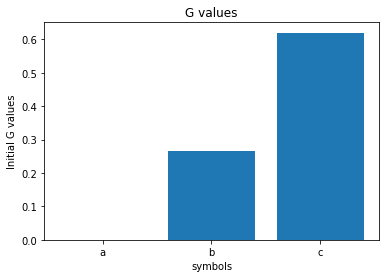

In [3]:
#G plot
plt.figure
k=list(initial_G_dict.values())
#print(k.shape)
plt.bar(symbols,k)
plt.xlabel("symbols")
plt.ylabel("Initial G values")
plt.title("G values")

In [4]:
#cdf pdf plot function
def cdf_pdf_plot(symbols,pmf):
  cdf=np.cumsum(pmf)
  plt.bar(symbols,cdf,label='cdf')
  plt.xlabel("symbols")
  plt.ylabel("cdf values")
  plt.legend()
  plt.figure()
  plt.bar(symbols,pmf,label="pmf")
  plt.xlabel("symbols")
  plt.ylabel("pmf values")
  plt.legend()

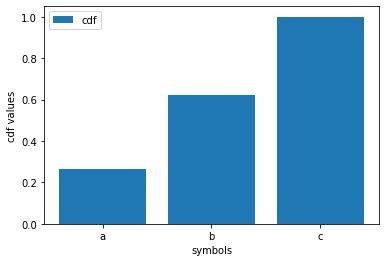

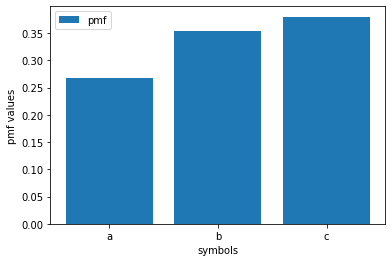

In [ ]:
#pdf and cdf plot

cdf_pdf_plot(symbols,prob_pmf)

In [5]:
#recursive probability for the sequence
#p(x^n) = p(x^(n-1))*p(x_n)
def probability_xn(input_sequence,n,dictionary_prob):
  if input_sequence in dictionary_prob:
    return dictionary_prob[input_sequence]
  else :
    k=probability_xn(input_sequence[0:n-1],n-1,dictionary_prob)*dictionary_prob[input_sequence[n-1]]
    return k

In [6]:
#binary representation of arithmetic code

#termination bits calculation
def termination_bits(input_sequence):
  p_xn=probability_xn(input_sequence,len(input_sequence),pmf_dict)
  no_bits=math.ceil(math.log2(1/p_xn))+1
  return no_bits

def decimal_converter(num):  

    while num > 1: 

        num /= 10

    return num

def float_bin(number, places = 8): #default termination bits=8
    whole, dec = str(number).split(".") 
    whole = int(whole) 
    dec = int (dec) 
    res = bin(whole).lstrip("0b") + "."


    for x in range(places): 
        whole, dec = str((decimal_converter(dec)) * 2).split(".") 
        dec = int(dec) 
        res += whole 
    return res

In [7]:
#Recursive formula for G(x^n)

def G_xn(input_sequence,n,initial_G_dict,dictionary_prob):
  if input_sequence in initial_G_dict:
    return initial_G_dict[input_sequence]
  else:
    k=G_xn(input_sequence[0:n-1],n-1,initial_G_dict,pmf_dict)
    k+=probability_xn(input_sequence[0:n-1],n-1,dictionary_prob)*initial_G_dict[input_sequence[n-1]]
    return k

In [8]:
# finding F_bar which in binary is encoded bits 
#F_bar(x^n)=G(x^n)+p(x^n)/2

def conditional_F_bar(input_sequence,initial_G_dict,dictionary_prob):
  k=G_xn(input_sequence,len(input_sequence),initial_G_dict,dictionary_prob) 
  k+=(probability_xn(input_sequence,len(input_sequence),dictionary_prob))/2
  return k

In [9]:
#Displaying all results

print("arithmetic code for the sequence 1 is ")
code_dec_seq1=conditional_F_bar(input_sequence1,initial_G_dict,pmf_dict)
totalbits_seq1=termination_bits(input_sequence1)
print(code_dec_seq1)
print("terminated bits for sequence 1 is",totalbits_seq1)
print("Encoded arithmetic code  for sequence 1 is:",float_bin(code_dec_seq1,totalbits_seq1))
#print("arithmetic code for the sequence 2 is ")
code_dec_seq2=conditional_F_bar(input_sequence2,initial_G_dict,pmf_dict)
totalbits_seq2=termination_bits(input_sequence2)
print("terminated bits for sequence 2 is",totalbits_seq2)
print("arithmetic code for the sequence 2 is ")
print(code_dec_seq2)
print("Encoded arithmetic code  for sequence 2 is:",float_bin(code_dec_seq2,totalbits_seq2))




arithmetic code for the sequence 1 is 
0.8104216906723426
terminated bits for sequence 1 is 17
Encoded arithmetic code  for sequence 1 is: .11001111011101111
terminated bits for sequence 2 is 16
arithmetic code for the sequence 2 is 
0.14972510474928466
Encoded arithmetic code  for sequence 2 is: .0010011001010111
